## Imports 

In [1]:
# imports - matploltib, pandas, NumPy
import pandas as pd 

In [2]:

import warnings
warnings.filterwarnings('ignore')


In [3]:
# imports - plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from IPython.display import HTML

from plotly.offline import iplot
import plotly as py
import cufflinks as cf

py.offline.init_notebook_mode(connected=True)
cf.go_offline()


***
## Load and preparing dataset

In [4]:
# df = pd.read_csv('orders.csv', encoding= 'unicode_escape')
date_columns = ['Order Date', 'Ship Date']
df = pd.read_csv('orders.csv', parse_dates=date_columns, encoding= 'unicode_escape')

In [5]:
df.head()

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,Region,Agent,Country,State or Province,City,Order Date,Ship Date,Profit,Quantity ordered new,Sales
0,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,...,West,William,United States,Washington,Anacortes,2015-07-01,2015-08-01,4.56,4,13.01
1,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,...,West,William,United States,California,San Gabriel,2015-06-13,2015-06-15,4390.37,12,6362.85
2,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,...,East,Erin,United States,New Jersey,Roselle,2015-02-15,2015-02-17,-53.81,22,211.15
3,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,...,Central,Chris,United States,Minnesota,Prior Lake,2015-12-05,2015-05-14,803.47,16,1164.45
4,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Central,Chris,United States,Minnesota,Prior Lake,2015-12-05,2015-05-13,-24.03,7,22.23


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order Priority        1952 non-null   object        
 1   Discount              1952 non-null   float64       
 2   Unit Price            1952 non-null   float64       
 3   Shipping Cost         1952 non-null   float64       
 4   Customer ID           1952 non-null   int64         
 5   Customer Name         1952 non-null   object        
 6   Ship Mode             1952 non-null   object        
 7   Customer Segment      1952 non-null   object        
 8   Product Category      1952 non-null   object        
 9   Product Sub-Category  1952 non-null   object        
 10  Product Container     1952 non-null   object        
 11  Product Name          1952 non-null   object        
 12  Product Base Margin   1936 non-null   float64       
 13  Region            

***
**First Notes:**<br>
Looks like that we have received here a very good dataset and we see only null values in one column which won't affect our analysis.<br>
Please note we have already converted dates to datetime objects while reading the csv.

In [7]:
# We will create a copy of the dataset as always
df_copy = df.copy()

*** 
### Distribuation of qualitative data

### Priorities

We will start from checking order priorities - costs and profits

In [8]:
# first we will check for our unique priorities
priority_names = df_copy['Order Priority'].unique()
priority_names

array(['High', 'Not Specified', 'Critical', 'Medium', 'Low', 'Critical '],
      dtype=object)

**Pay attention** that one of the values or more seem that they have unessacry space and can break our analysis

In [9]:
# there are two options for this
df_copy['Order Priority'] = df_copy['Order Priority'].str.strip()

In [10]:
# second option is to use within reading csv
# df = pd.read_csv('orders.csv', parse_dates=date_columns, encoding= 'unicode_escape', skipinitialspace=True)

In [11]:
priority_names = df_copy['Order Priority'].unique()
priority_names

array(['High', 'Not Specified', 'Critical', 'Medium', 'Low'], dtype=object)

In [12]:
priorities = df_copy.groupby('Order Priority')['Sales'].agg(['sum', 'count']).reset_index().rename(columns={
    'sum':'amount_of_sales', 'count':'count_of_sales'
})
priorities

,Order Priority,amount_of_sales,count_of_sales
0,Critical,445010.03,391
1,High,310095.48,391
2,Low,379127.34,398
3,Medium,370078.81,376
4,Not Specified,420026.22,396


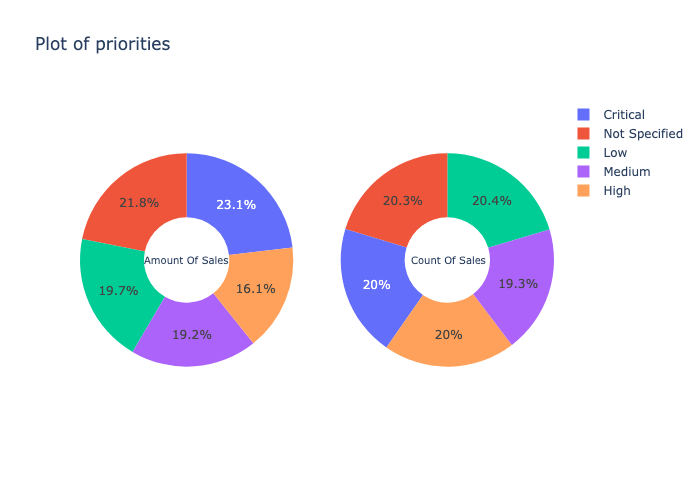

In [37]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
 
fig.add_trace(go.Pie(labels = priorities['Order Priority'], 
                     values = priorities['amount_of_sales'], name = 'Amount Of Sales'), 1,1)

fig.add_trace(go.Pie(labels =  priorities['Order Priority']
                     ,values = priorities['count_of_sales'], name = 'Count Of Sales'), 1,2)
 
fig.update_traces(hole=.4)
 
fig.update_layout(
   title_text = 'Plot of priorities',
   annotations = [dict(text='Amount Of Sales', x = 0.13, y = 0.5, font_size = 10, showarrow=False),
   dict(text='Count Of Sales', x = 0.86, y = 0.5, font_size = 10, showarrow=False)]
)
# fig.show() # -> to display the full interactive plot
fig.show("png") # -> to display the plot in github


We can see that that the disribution of priorities looks good and there is not something that much higher and might be wrongful descisions.

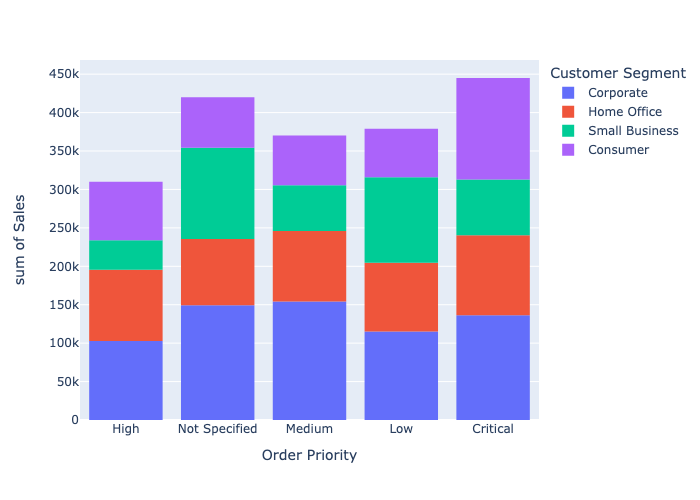

In [14]:
# now lets check the same but based on also customer segment
fig = px.histogram(data_frame=df_copy, x=df_copy['Order Priority'], y = df_copy['Sales'],
                   color=df_copy['Customer Segment'])
fig.update_layout(hovermode = 'x unified')
# fig.show() # -> to display the full interactive plot
fig.show("png") # -> to display the plot in github

Also based on customer segment, seems that we have good descicion making, and no other is more important than the other by greater priority.


***
### Products

Now I would like to check the products values: **Product Category, Product Sub-Category, Product Container**.<br>
The best why I can think of is either sunburst or treemap.<br>
Since it is only three columns, it won't matter which you will decide.

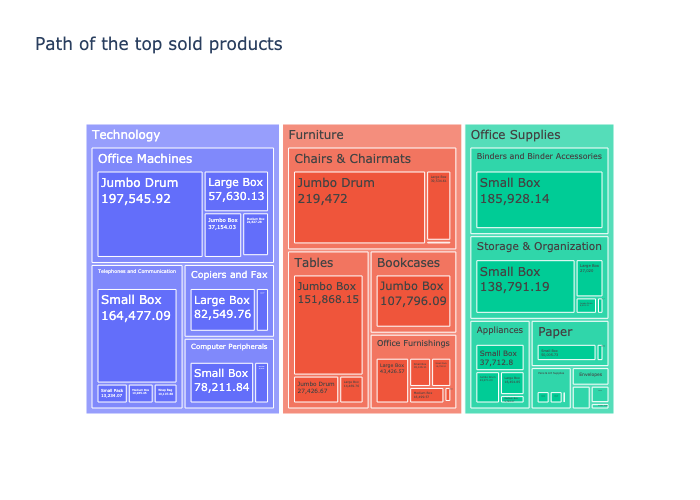

In [15]:
fig = px.treemap(data_frame=df_copy,
                 path=['Product Category', 'Product Sub-Category', 'Product Container'], 
                 values = 'Sales', height = 500,
                 title = 'Path of the top sold products')
 
fig.data[0].textinfo = 'label+text+value'
# fig.show() # -> to display the full interactive plot
fig.show("png") # -> to display the plot in github

From what we can see, we have three product categories, and the most sales go to Technology.<br>
We can also see that Jumbo drum getting the most sales ( by pretty big gap ) in both Techonology and furniture.<br>
This might indicate about the need to check why it not top selling in Office Supplies.

***
### Timeline of sales

We will start from creating both **month names for better vissibilty** and **month number - for sorting**

In [16]:
df_copy['ship_month_number']=df_copy['Ship Date'].dt.month
df_copy['order_month_number']=df_copy['Order Date'].dt.month
df_copy['ship_month'] = df_copy['Ship Date'].dt.strftime('%b-%Y')
df_copy['order_month'] = df_copy['Order Date'].dt.strftime('%b-%Y')

# df_copy.head()

In [17]:
# both values repeat the same so it is not affect the groupby aggregations
ships = df_copy.groupby(['ship_month', 'ship_month_number'])['Sales'].agg(['count', 'sum']).reset_index()
orders = df_copy.groupby(['order_month', 'order_month_number'])['Sales'].agg(['count', 'sum']).reset_index()

In [18]:
# here we use it to sort correctly
ships = ships.sort_values(by='ship_month_number')
orders = orders.sort_values(by='order_month_number')

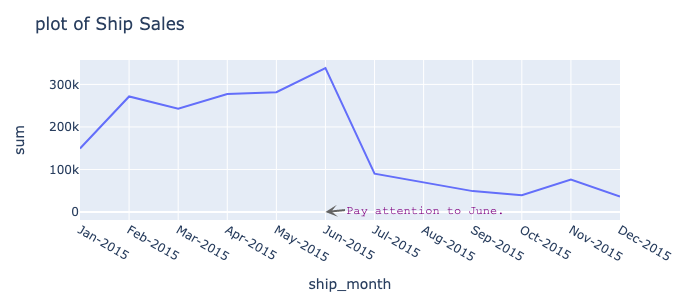

In [19]:
fig = px.line(data_frame=ships, x = ships['ship_month'], y = 'sum')
fig.update_layout(#hovermode = 'x unified',
    height = 300, title = 'plot of Ship Sales', showlegend=False)
fig.add_annotation(
    x='Jun-2015'
    , y=178+1
    , text=f'Pay attention to June.'
    , yanchor='top'
    , showarrow=True
    , arrowhead=3
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=100
    , ay=-10
    , font=dict(size=12, color="purple", family="Courier New, monospace")
    , align="left"
)
# fig.show() # -> to display the full interactive plot
fig.show("png") # -> to display the plot in github

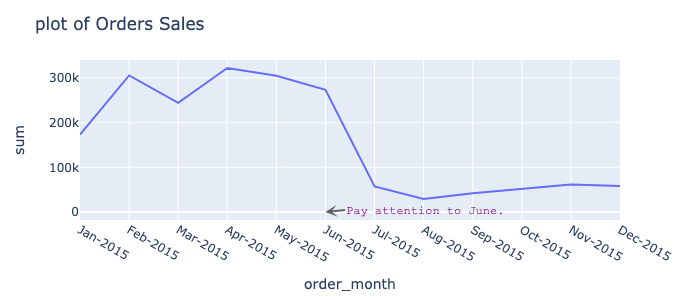

In [20]:
fig = px.line(data_frame=orders, x = orders['order_month'], y = 'sum')
fig.update_layout(#hovermode = 'x unified',
    height = 300, title = 'plot of Orders Sales', showlegend=False)
fig.add_annotation(
    x='Jun-2015'
    , y=178+1
    , text=f'Pay attention to June.'
    , yanchor='top'
    , showarrow=True
    , arrowhead=3
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=100
    , ay=-10
    , font=dict(size=12, color="purple", family="Courier New, monospace")
    , align="left"
)
# fig.show() # -> to display the full interactive plot
fig.show("png") # -> to display the plot in github

We can see an absolute decrease from June to the rest of years in terms of sales.<br>
Very bad for the compnany and needs to check what happened.

***
### Shipping mode

We will create a funnel chart

In [21]:
shipping_temp = df_copy.groupby('Ship Mode')['Sales'].agg(['sum', 'count']).reset_index().rename(columns={
    'sum':'amount_of_sales', 'count':'count_of_sales'
})

In [22]:
shipping_temp = shipping_temp.sort_values(by='amount_of_sales', ascending = False)

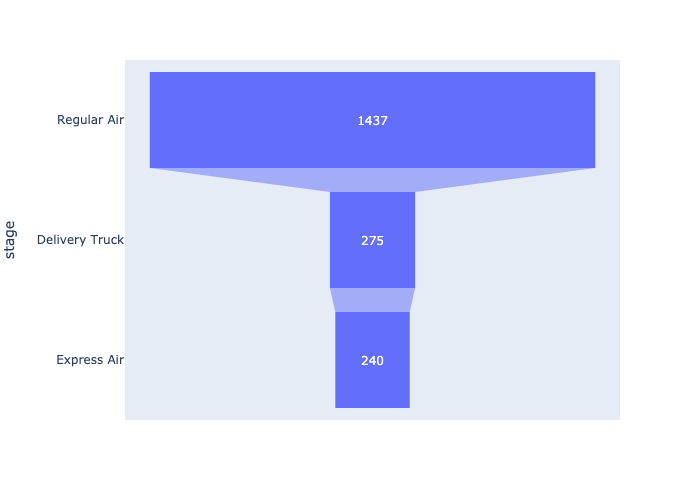

In [23]:
import plotly.express as px
data = dict(
    number=shipping_temp['count_of_sales'],
    stage=shipping_temp['Ship Mode'])
fig = px.funnel(data, x='number', y='stage')
# fig.show() # -> to display the full interactive plot
fig.show("png") # -> to display the plot in github

***
### Countries

In [24]:
df.head()

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,Region,Agent,Country,State or Province,City,Order Date,Ship Date,Profit,Quantity ordered new,Sales
0,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,...,West,William,United States,Washington,Anacortes,2015-07-01,2015-08-01,4.56,4,13.01
1,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,...,West,William,United States,California,San Gabriel,2015-06-13,2015-06-15,4390.37,12,6362.85
2,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,...,East,Erin,United States,New Jersey,Roselle,2015-02-15,2015-02-17,-53.81,22,211.15
3,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,...,Central,Chris,United States,Minnesota,Prior Lake,2015-12-05,2015-05-14,803.47,16,1164.45
4,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Central,Chris,United States,Minnesota,Prior Lake,2015-12-05,2015-05-13,-24.03,7,22.23


In [25]:
# we can also create an address and use a package of geopy for smaller dataframes
df_copy['address'] = df_copy['City'] +', ' + df_copy['State or Province'] + ", " + df_copy['Country']

Here we will prefer to use chorlopath instead folium

Please note that for US states ISO2 there is not a package that helps so here's a github repo which you can copy a dictionary with all the states

In [26]:
# https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [27]:
df_copy['code'] = df_copy['State or Province'].apply(lambda x: us_state_to_abbrev.get(x))

In [28]:
# df_copy.head()

In [29]:
country_grouped = df_copy.groupby(['order_month','order_month_number', 'code'])['Sales'].agg(['sum', 'count']).reset_index().rename(columns={
    'sum':'amount_of_sales', 'count':'count_of_sales'
})

In [30]:
country_grouped = country_grouped.sort_values(by='order_month_number')

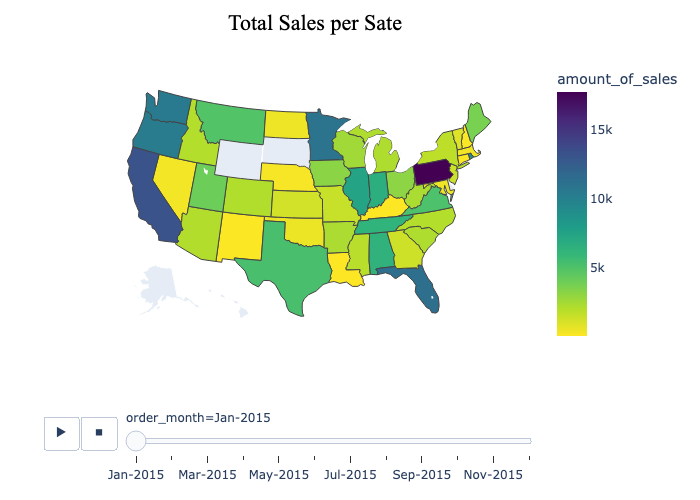

In [31]:
fig = px.choropleth(country_grouped,
                    locations='code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='amount_of_sales',
                    color_continuous_scale="Viridis_r", 
                    animation_frame='order_month'
#make sure 'animation_frame' is string type and sorted in ascending order
                    )

fig.update_layout(
      title_text = 'Total Sales per Sate',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )


# fig.show() # -> to display the full interactive plot
fig.show("png") # -> to display the plot in github